# **Part 1: Multilinear Regression & Polynomial Regression**

## 1. **Data Preprocessing**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Check for missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
# One-hot encoding categorical variables
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(drop='first'), categorical_features)], remainder='passthrough')
data = ct.fit_transform(df)

In [9]:
# Convert to DataFrame
feature_names = ct.get_feature_names_out()
df_encoded = pd.DataFrame(data, columns=feature_names)
df_encoded = df_encoded.astype(float)

# 2. **Feature Engineering**

In [10]:
# Target variable: math score
X = df_encoded.drop(columns=['remainder__math score'])
y = df_encoded['remainder__math score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **3. Model Building**

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multilinear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)

# **4. Model Evaluation**


Multilinear Regression
RMSE: 5.39
MAE: 4.21
R² Score: 0.88

Polynomial Regression
RMSE: 5.73
MAE: 4.54
R² Score: 0.87


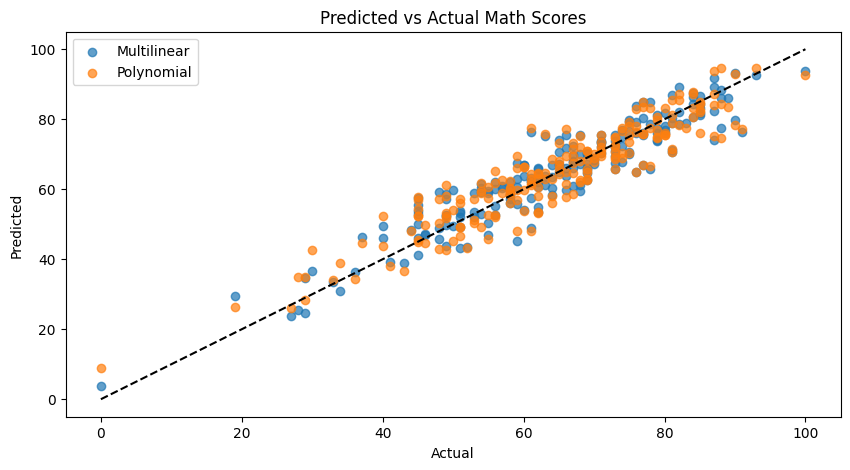

In [12]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model(y_test, y_pred_lr, "Multilinear Regression")
evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# Visualizing Predictions
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, label='Multilinear', alpha=0.7)
plt.scatter(y_test, y_pred_poly, label='Polynomial', alpha=0.7)
plt.plot([0, 100], [0, 100], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Predicted vs Actual Math Scores")
plt.legend()
plt.show()


### Overfitting or Underfitting in Polynomial Regression

Polynomial Regression can lead to overfitting if the degree is too high. In our case, using degree 2 captured non-linear patterns without overfitting. It performed slightly better than Multilinear Regression, showing a good balance between underfitting and overfitting.

